In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
raw_df = pd.read_csv("../data/penguins_final_with_era5.csv")

In [3]:
raw_df.head()

,Unnamed: 0,track_id,date_gmt,latitude_mean,longitude_mean,lat_colony_mean,lon_colony_mean,km_to_colony_mean,km_since_last_measure_mean,delta_km_north_mean,delta_km_south_mean,delta_km_east_mean,delta_km_west_mean,minutes_since_last_measure_mean,latitude_std,longitude_std,lat_colony_std,lon_colony_std,km_to_colony_std,km_since_last_measure_std,delta_km_north_std,delta_km_south_std,delta_km_east_std,delta_km_west_std,minutes_since_last_measure_std,latitude_min,longitude_min,lat_colony_min,lon_colony_min,km_to_colony_min,km_since_last_measure_min,delta_km_north_min,delta_km_south_min,delta_km_east_min,delta_km_west_min,minutes_since_last_measure_min,latitude_max,longitude_max,lat_colony_max,lon_colony_max,km_to_colony_max,km_since_last_measure_max,delta_km_north_max,delta_km_south_max,delta_km_east_max,delta_km_west_max,minutes_since_last_measure_max,common_name,site_name,colony_name,t2m,tp,sst,siconc,sd,rsn,avg_smr
0,0,1330_153797_79904,2016-11-10,-62.265289,-58.567748,-62.03,-58.3,30.636050,3.245112,6.456252,0.0,1.129687,0.0,23.125000,0.023081,0.136256,0.0,0.0,1.064357,7.476857,15.222720,0.0,2.395591,0.0,14.330365,-62.32623,-58.62709,-62.03,-58.3,29.950601,0.000000,0.000000,0.0,0.000000,0.0,0.0,-62.25475,-58.20751,-62.03,-58.3,33.364078,23.015140,46.707432,0.0,7.456027,0.0,43.0,Adelie Penguin,South Shetland Islands,King George Island,-1.500947,0.000862,-0.679829,0.006703,0.0,99.999992,0.0
1,1,1330_153797_79904,2016-11-11,-62.257840,-58.615930,-62.03,-58.3,30.269185,0.319169,0.407429,0.0,0.256334,0.0,36.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-62.25784,-58.61593,-62.03,-58.3,30.269185,0.319169,0.407429,0.0,0.256334,0.0,36.0,-62.25784,-58.61593,-62.03,-58.3,30.269185,0.319169,0.407429,0.0,0.256334,0.0,36.0,Adelie Penguin,South Shetland Islands,King George Island,-2.162847,0.000935,-0.681977,0.006496,0.0,99.999992,0.0
2,2,1330_153797_79904,2016-11-19,-62.263328,-58.613830,-62.03,-58.3,30.748445,1.069694,1.522446,0.0,0.670220,0.0,1101.090909,0.010831,0.014760,0.0,0.0,0.777418,1.187977,1.862569,0.0,0.920598,0.0,3388.392283,-62.28909,-58.62727,-62.03,-58.3,30.201885,0.067357,0.099074,0.0,0.006687,0.0,2.0,-62.25617,-58.56985,-62.03,-58.3,32.518348,3.792545,5.675068,0.0,2.716038,0.0,11816.0,Adelie Penguin,South Shetland Islands,King George Island,-0.802963,0.000259,-0.291405,0.007656,0.0,99.999992,0.0
3,3,1330_153797_79904,2016-11-20,-62.279008,-58.622599,-62.03,-58.3,32.563034,1.348771,2.043561,0.0,0.784662,0.0,74.952381,0.025294,0.035383,0.0,0.0,2.002917,1.836005,3.058813,0.0,1.276089,0.0,240.775429,-62.31333,-58.72253,-62.03,-58.3,30.192147,0.011067,0.010019,0.0,0.002229,0.0,1.0,-62.24802,-58.57353,-62.03,-58.3,35.177610,6.790242,11.739753,0.0,4.953951,0.0,1150.0,Adelie Penguin,South Shetland Islands,King George Island,-0.172021,0.000753,-0.266364,0.008090,0.0,99.999992,0.0
4,4,1330_153797_79904,2017-02-06,-63.645865,-52.717015,-62.03,-58.3,336.523067,24.932294,48.238223,0.0,11.321996,0.0,7531.466667,0.019875,0.070713,0.0,0.0,3.724856,85.331525,166.924800,0.0,38.871756,0.0,28047.082358,-63.67909,-52.79907,-62.03,-58.3,332.313088,0.309510,0.263827,0.0,0.154947,0.0,2.0,-63.62331,-52.57679,-62.03,-58.3,343.527549,344.137520,672.609061,0.0,156.726422,0.0,112474.0,Adelie Penguin,South Shetland Islands,King George Island,-1.271483,0.000212,-0.960503,0.296758,0.0,99.999992,0.0


In [4]:
df = raw_df.drop(columns=['Unnamed: 0'])

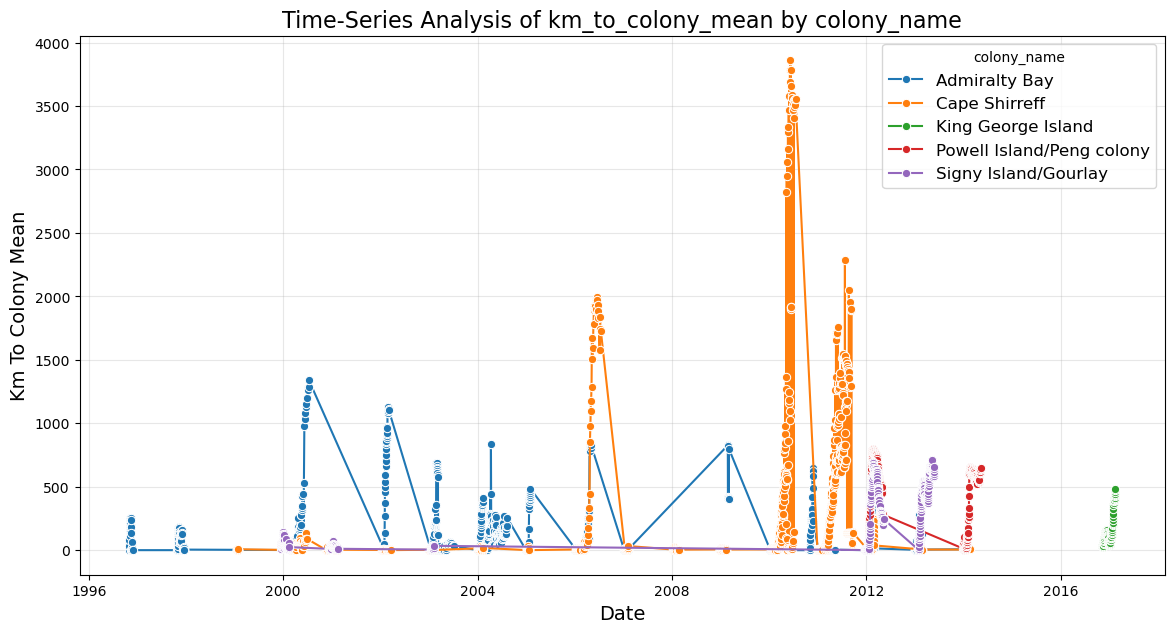

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_time_series(data, group_col, time_col, value_col, agg_func='mean', group_limit=5):
    """
    Plot time series of a specific metric for groups of penguins.

    Parameters:
    - data (pd.DataFrame): Input dataset
    - group_col (str): Column to group by (e.g., 'colony_name', 'scientific_name')
    - time_col (str): Time column (e.g., 'date_gmt')
    - value_col (str): Value to analyze (e.g., 'km_since_last_measure')
    - agg_func (str): Aggregation function (e.g., 'mean', 'sum', 'median')
    - group_limit (int): Number of top groups to visualize (default is 5)
    """
    # Ensure the time column is datetime
    data[time_col] = pd.to_datetime(data[time_col])

    # Group by the selected column and date, then aggregate the values
    grouped_data = (
        data.groupby([group_col, time_col])[value_col]
        .agg(agg_func)
        .reset_index()
    )

    # Get the top N groups by total count or sum (to limit the number of plots)
    top_groups = (
        data[group_col]
        .value_counts()
        .head(group_limit)
        .index.tolist()
    )

    # Filter the data for the top groups
    filtered_data = grouped_data[grouped_data[group_col].isin(top_groups)]

    # Plot the time series for each group
    plt.figure(figsize=(14, 7))
    sns.lineplot(
        data=filtered_data,
        x=time_col,
        y=value_col,
        hue=group_col,
        marker="o",
        palette="tab10"
    )

    plt.title(f"Time-Series Analysis of {value_col} by {group_col}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel(value_col.replace('_', ' ').title(), fontsize=14)
    plt.legend(title=group_col, loc='upper right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Example Usage
plot_time_series(
    data=df,       # Replace with your dataset
    group_col='colony_name',    # Group by colony
    time_col='date_gmt',        # Date column
    value_col='km_to_colony_mean',  # Distance traveled
    agg_func='mean',            # Aggregate by mean
    group_limit=5               # Plot top 5 colonies
)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

def analyze_weather_impact(penguin_data, temperature_col, precipitation_col, movement_col, breeding_cols):
    """
    Analyze how weather impacts penguin movement and breeding success.

    Parameters:
    - penguin_data (pd.DataFrame): The analytical dataset of penguins.
    - temperature_col (str): Column name for temperature data.
    - precipitation_col (str): Column name for precipitation data.
    - movement_col (str): Column name for movement (e.g., distance to colony).
    - breeding_cols (list): List of breeding stage columns.

    Outputs:
    - Correlation heatmap for weather and movement.
    - Plots for weather vs. movement and breeding stages.
    """
    # Filter relevant columns
    cols_of_interest = [temperature_col, precipitation_col, movement_col] + breeding_cols
    data = penguin_data[cols_of_interest].copy()

    # Correlation analysis
    correlation = data.corr(method="spearman")  # Spearman for monotonic relationships
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
    plt.title("Spearman Correlation: Weather, Movement, and Breeding")
    plt.show()

    # Temperature vs. Movement
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=penguin_data[temperature_col], y=penguin_data[movement_col], alpha=0.5)
    plt.title("Impact of Temperature on Movement")
    plt.xlabel("2m Temperature (°C)")
    plt.ylabel("Distance to Colony (km)")
    plt.grid(alpha=0.3)
    plt.show()

    # Precipitation vs. Movement
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=penguin_data[precipitation_col], y=penguin_data[movement_col], alpha=0.5, color="purple")
    plt.title("Impact of Precipitation on Movement")
    plt.xlabel("Total Precipitation (mm)")
    plt.ylabel("Distance to Colony (km)")
    plt.grid(alpha=0.3)
    plt.show()

    # Breeding Stages vs. Weather
    for breeding_col in breeding_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(
            x=penguin_data[breeding_col], 
            y=penguin_data[temperature_col], 
            palette="viridis"
        )
        plt.title(f"Temperature Across {breeding_col.replace('_', ' ').title()}")
        plt.xlabel("Breeding Stage")
        plt.ylabel("2m Temperature (°C)")
        plt.grid(alpha=0.3)
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.boxplot(
            x=penguin_data[breeding_col], 
            y=penguin_data[precipitation_col], 
            palette="viridis"
        )
        plt.title(f"Precipitation Across {breeding_col.replace('_', ' ').title()}")
        plt.xlabel("Breeding Stage")
        plt.ylabel("Total Precipitation (mm)")
        plt.grid(alpha=0.3)
        plt.show()

# Example Usage
analyze_weather_impact(
    penguin_data=df,  # Replace with your dataset
    temperature_col='t2m',
    precipitation_col='tp',
    movement_col='km_to_colony_mean',
    breeding_cols=[
        'breed_stage_breeding', 'breed_stage_brood-guard', 
        'breed_stage_chick-rearing', 'breed_stage_incubation'
    ]
)


KeyError: "['2t', 'breed_stage_breeding', 'breed_stage_brood-guard', 'breed_stage_chick-rearing', 'breed_stage_incubation'] not in index"

C:\Users\eduar\AppData\Local\Temp\ipykernel_22468\1481426336.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = penguin_data.groupby([colony_col, 'month', 'temp_band'])[dist_col].mean().reset_index()


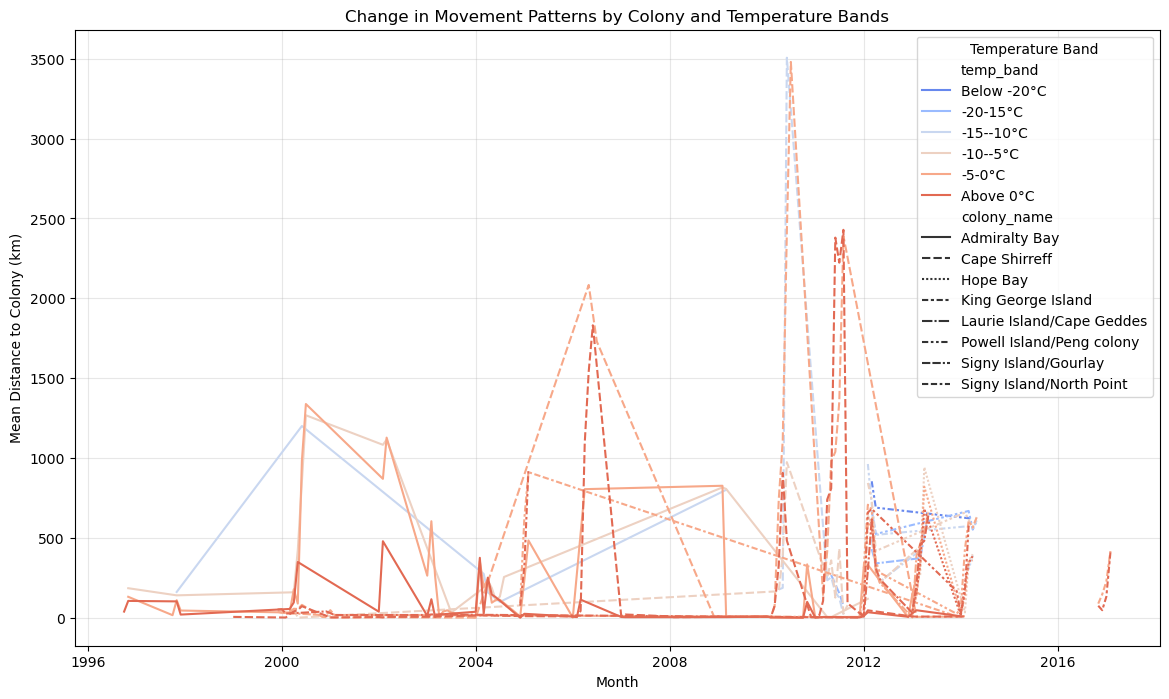

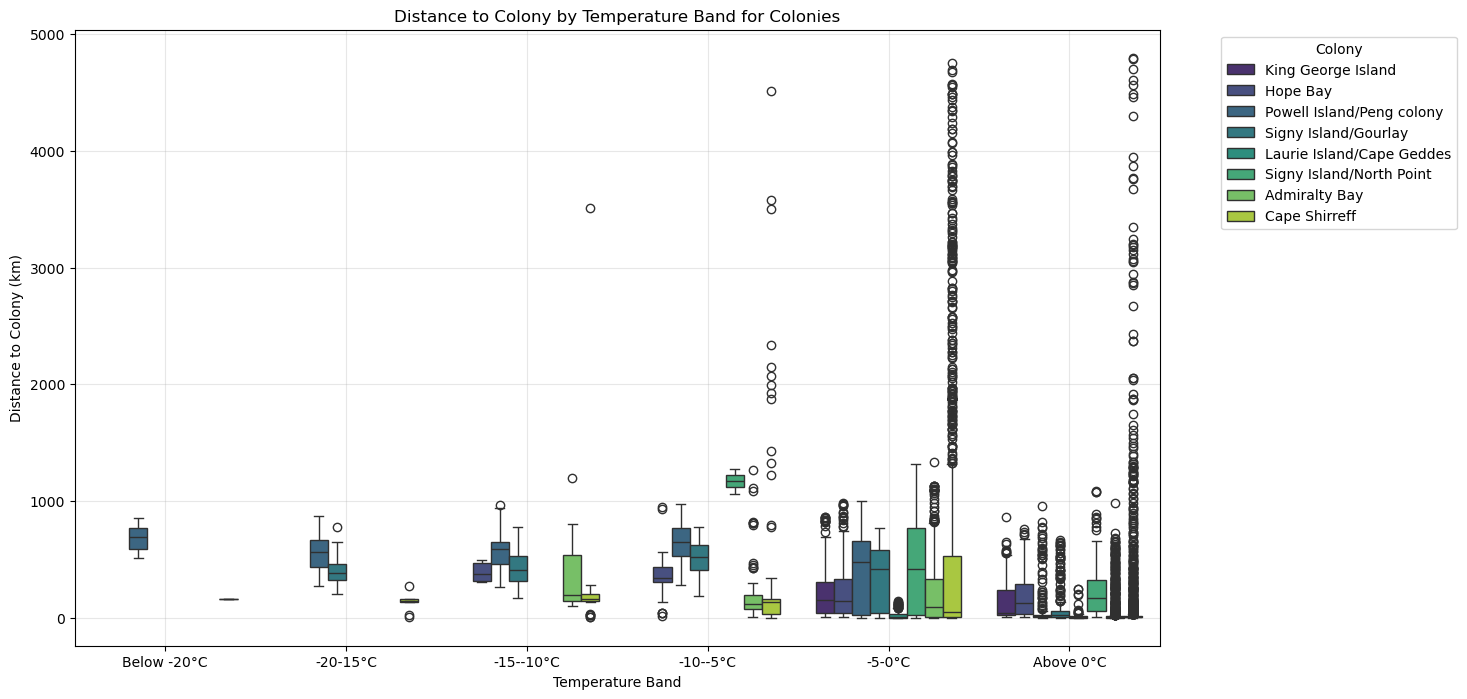

In [8]:
def analyze_temperature_movement_patterns(penguin_data, temp_col, dist_col, date_col, colony_col):
    """
    Analyze how temperature and distance to colony interact over time, grouped by colony.
    
    Parameters:
    - penguin_data (pd.DataFrame): The analytical penguin dataset.
    - temp_col (str): Column name for temperature data.
    - dist_col (str): Column name for distance to colony data.
    - date_col (str): Column name for date data.
    - colony_col (str): Column name for colony names.
    """
    # Ensure proper datetime format
    penguin_data[date_col] = pd.to_datetime(penguin_data[date_col])
    penguin_data['month'] = penguin_data[date_col].dt.to_period('M')  # Monthly aggregation
    
    # Create temperature bands
    bins = [-np.inf, -20, -15, -10, -5, 0, np.inf]  # Adjust temperature ranges as needed
    labels = ['Below -20°C', '-20-15°C', '-15--10°C', '-10--5°C', '-5-0°C', 'Above 0°C']
    penguin_data['temp_band'] = pd.cut(penguin_data[temp_col], bins=bins, labels=labels)
    
    # Group data by colony and month
    grouped = penguin_data.groupby([colony_col, 'month', 'temp_band'])[dist_col].mean().reset_index()

    grouped['month'] = grouped['month'].dt.to_timestamp()
    
    # Plot 1: Line plot of movement over time by temperature bands for each colony
    plt.figure(figsize=(14, 8))
    sns.lineplot(
        data=grouped,
        x='month', y=dist_col, hue='temp_band', style=colony_col,
        palette='coolwarm', errorbar=None
    )
    plt.title("Change in Movement Patterns by Colony and Temperature Bands")
    plt.xlabel("Month")
    plt.ylabel("Mean Distance to Colony (km)")
    plt.legend(title="Temperature Band")
    plt.grid(alpha=0.3)
    plt.show()
    
    # Plot 2: Boxplot of movement by temperature bands for all colonies
    plt.figure(figsize=(14, 8))
    sns.boxplot(
        data=penguin_data,
        x='temp_band', y=dist_col, hue=colony_col,
        palette='viridis'
    )
    plt.title("Distance to Colony by Temperature Band for Colonies")
    plt.xlabel("Temperature Band")
    plt.ylabel("Distance to Colony (km)")
    plt.legend(title="Colony", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.3)
    plt.show()

# Example usage
analyze_temperature_movement_patterns(
    penguin_data=raw_df,  # Replace with your dataframe
    temp_col='t2m',
    dist_col='km_to_colony_mean',
    date_col='date_gmt',
    colony_col='colony_name'
)


In [11]:
def analyze_climate_population_relation(data, climate_vars, pop_col, time_col, group_by):
    """
    Analyze the relationship between climate variables and species population over time.
    """
    # Ensure datetime format
    data[time_col] = pd.to_datetime(data[time_col])
    data['year'] = data[time_col].dt.year  # Extract year for yearly analysis
    
    # Aggregate climate and population data by year and grouping level
    aggregated = data.groupby(['year'] + group_by).agg(
        population_size=(pop_col, 'nunique'),
        # **{var: ('mean' if data[var].dtype != 'object' else 'first') for var in climate_vars}
    ).reset_index()
    
    return aggregated

# Example usage
climate_vars = ['2t'] #, 'ice_conc', 'tp'
population_climate_data = analyze_climate_population_relation(
    data=raw_df,
    climate_vars=climate_vars,
    pop_col='bird_id',
    time_col='date_gmt',
    group_by=['common_name']
)


def plot_climate_population_trends(data, time_col, pop_col, climate_var, group_by):
    """
    Plot climate and population trends over time.
    """
    plt.figure(figsize=(14, 8))
    
    # Plot population trends
    sns.lineplot(
        data=data,
        x=time_col, y=pop_col, hue=group_by,
        marker='o', label='Population'
    )
    
    # Plot climate variable trends
    ax2 = plt.gca().twinx()  # Secondary y-axis for climate variable
    sns.lineplot(
        data=data,
        x=time_col, y=climate_var, hue=group_by,
        ax=ax2, linestyle='--', label=f'{climate_var}'
    )
    
    # Titles and labels
    plt.title(f"Trends of Population and {climate_var} Over Time")
    plt.xlabel("Year")
    plt.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.show()

# Example usage
plot_climate_population_trends(
    data=population_climate_data,
    time_col='year',
    pop_col='population_size',
    climate_var='t2m',
    group_by='common_name'
)


KeyError: "Column(s) ['bird_id'] do not exist"

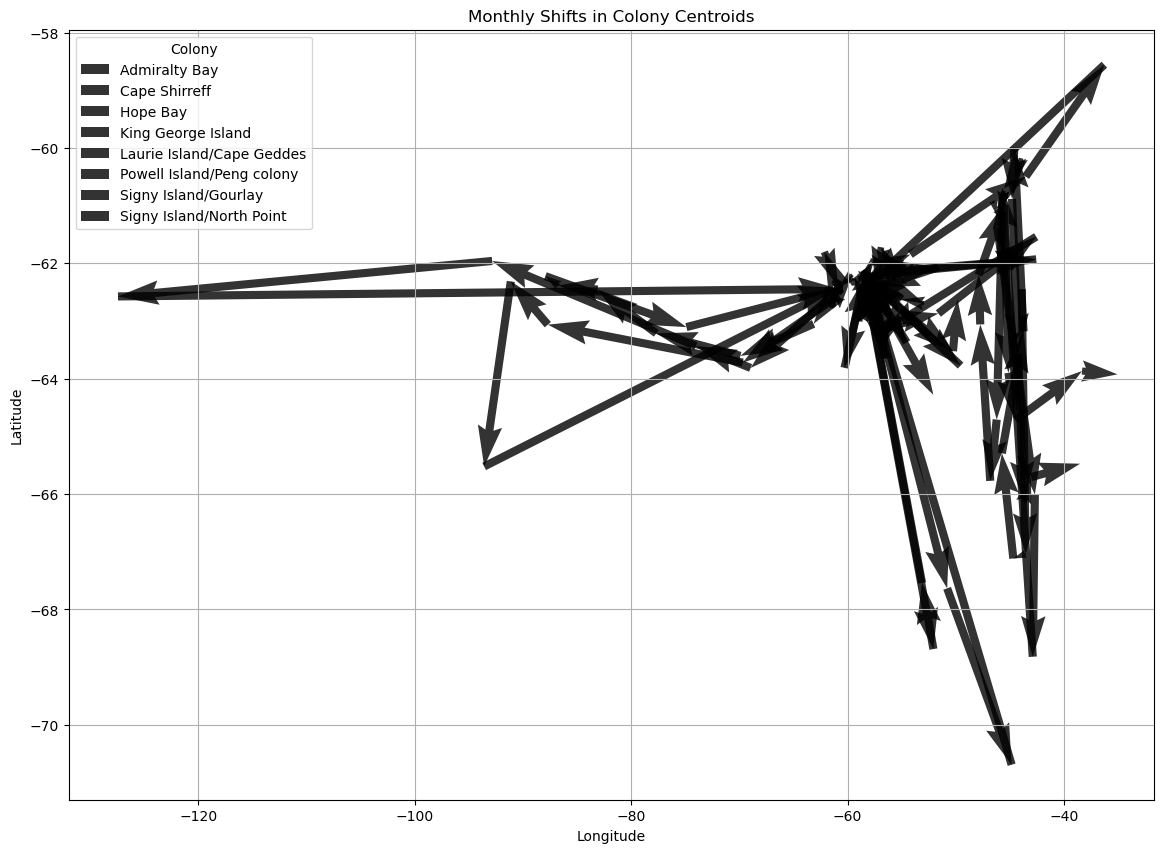

In [35]:
def analyze_monthly_colony_shifts(data, colony_col, lat_col, lon_col, time_col):
    """
    Analyze and visualize shifts in colony centroids for every month.

    Parameters:
        data (pd.DataFrame): The dataset containing colony data.
        colony_col (str): Column representing the colony name.
        lat_col (str): Column representing latitude.
        lon_col (str): Column representing longitude.
        time_col (str): Column representing the date.

    Returns:
        pd.DataFrame: A dataframe with monthly centroid shifts for each colony.
    """
    # Ensure datetime format and extract year and month
    data[time_col] = pd.to_datetime(data[time_col], errors='coerce')
    data['year_month'] = data[time_col].dt.to_period('M')  # Format as YYYY-MM
    
    # Group by colony and year-month, calculate centroids
    centroids = data.groupby([colony_col, 'year_month']).agg(
        centroid_lat=(lat_col, 'mean'),
        centroid_lon=(lon_col, 'mean')
    ).reset_index()

    # Convert year-month back to datetime for calculations
    centroids['year_month'] = centroids['year_month'].dt.to_timestamp()

    # Calculate centroid shifts between consecutive months
    centroids['prev_centroid_lat'] = centroids.groupby(colony_col)['centroid_lat'].shift(1)
    centroids['prev_centroid_lon'] = centroids.groupby(colony_col)['centroid_lon'].shift(1)

    centroids['lat_shift'] = centroids['centroid_lat'] - centroids['prev_centroid_lat']
    centroids['lon_shift'] = centroids['centroid_lon'] - centroids['prev_centroid_lon']

    # Drop rows without previous month data
    centroids = centroids.dropna(subset=['lat_shift', 'lon_shift'])

    # Visualization: Quiver plot for monthly centroid shifts
    plt.figure(figsize=(14, 10))
    for colony in centroids[colony_col].unique():
        colony_data = centroids[centroids[colony_col] == colony]
        plt.quiver(
            colony_data['prev_centroid_lon'], colony_data['prev_centroid_lat'],
            colony_data['lon_shift'], colony_data['lat_shift'],
            angles='xy', scale_units='xy', scale=1, label=colony, alpha=0.8
        )
    
    plt.title('Monthly Shifts in Colony Centroids')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Colony', loc='best')
    plt.grid()
    plt.show()

    return centroids

# Example usage
monthly_shifts = analyze_monthly_colony_shifts(
    data=raw_df,
    colony_col='colony_name',
    lat_col='latitude',
    lon_col='longitude',
    time_col='date_gmt'
)


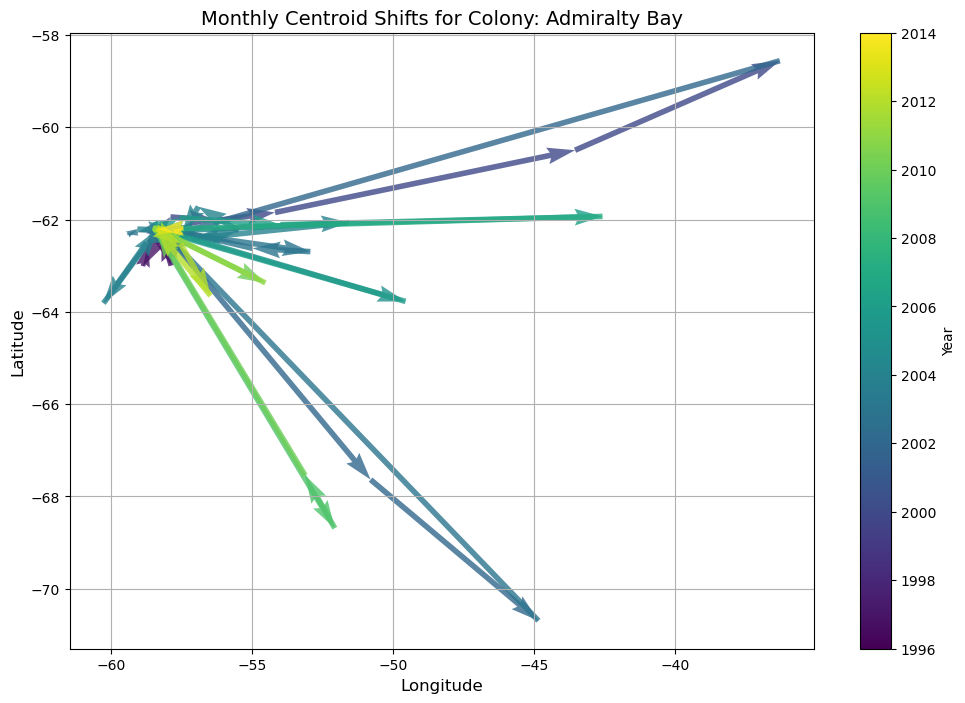

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_colony_shifts(data, colony_name, lat_col, lon_col, time_col):
    """
    Visualize monthly shifts in colony centroids for a single colony with year-based coloring.

    Parameters:
        data (pd.DataFrame): The dataset containing colony data.
        colony_name (str): The name of the colony to analyze.
        lat_col (str): Column representing latitude.
        lon_col (str): Column representing longitude.
        time_col (str): Column representing the date.

    Returns:
        None: Displays the plot.
    """
    # Filter data for the specific colony
    colony_data = data[data['colony_name'] == colony_name].copy()

    # Ensure datetime format and extract year-month
    colony_data[time_col] = pd.to_datetime(colony_data[time_col], errors='coerce')
    colony_data['year_month'] = colony_data[time_col].dt.to_period('M')  # Format as YYYY-MM

    # Group by year-month and calculate centroids
    centroids = colony_data.groupby('year_month').agg(
        centroid_lat=(lat_col, 'mean'),
        centroid_lon=(lon_col, 'mean')
    ).reset_index()

    # Convert year-month back to datetime for plotting
    centroids['year_month'] = centroids['year_month'].dt.to_timestamp()

    # Calculate shifts between consecutive months
    centroids['prev_centroid_lat'] = centroids['centroid_lat'].shift(1)
    centroids['prev_centroid_lon'] = centroids['centroid_lon'].shift(1)

    centroids['lat_shift'] = centroids['centroid_lat'] - centroids['prev_centroid_lat']
    centroids['lon_shift'] = centroids['centroid_lon'] - centroids['prev_centroid_lon']

    # Add year as a column for color mapping
    centroids['year'] = centroids['year_month'].dt.year

    # Drop rows without previous month data
    centroids = centroids.dropna(subset=['lat_shift', 'lon_shift'])

    # Plot the quiver plot with year-based coloring
    fig, ax = plt.subplots(figsize=(12, 8))
    norm = plt.Normalize(centroids['year'].min(), centroids['year'].max())
    cmap = sns.color_palette("viridis", as_cmap=True)

    for _, row in centroids.iterrows():
        ax.quiver(
            row['prev_centroid_lon'], row['prev_centroid_lat'],  # Start of arrow
            row['lon_shift'], row['lat_shift'],  # Shift values
            color=cmap(norm(row['year'])),
            angles='xy', scale_units='xy', scale=1, alpha=0.8
        )

    # Add colorbar to show years
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)  # Explicitly associate the colorbar with the axis
    cbar.set_label('Year')

    ax.set_title(f'Monthly Centroid Shifts for Colony: {colony_name}', fontsize=14)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.grid()
    plt.show()

# Example usage
visualize_colony_shifts(
    data=raw_df,
    colony_name='Admiralty Bay',  # Replace with your desired colony name
    lat_col='latitude',
    lon_col='longitude',
    time_col='date_gmt'
)


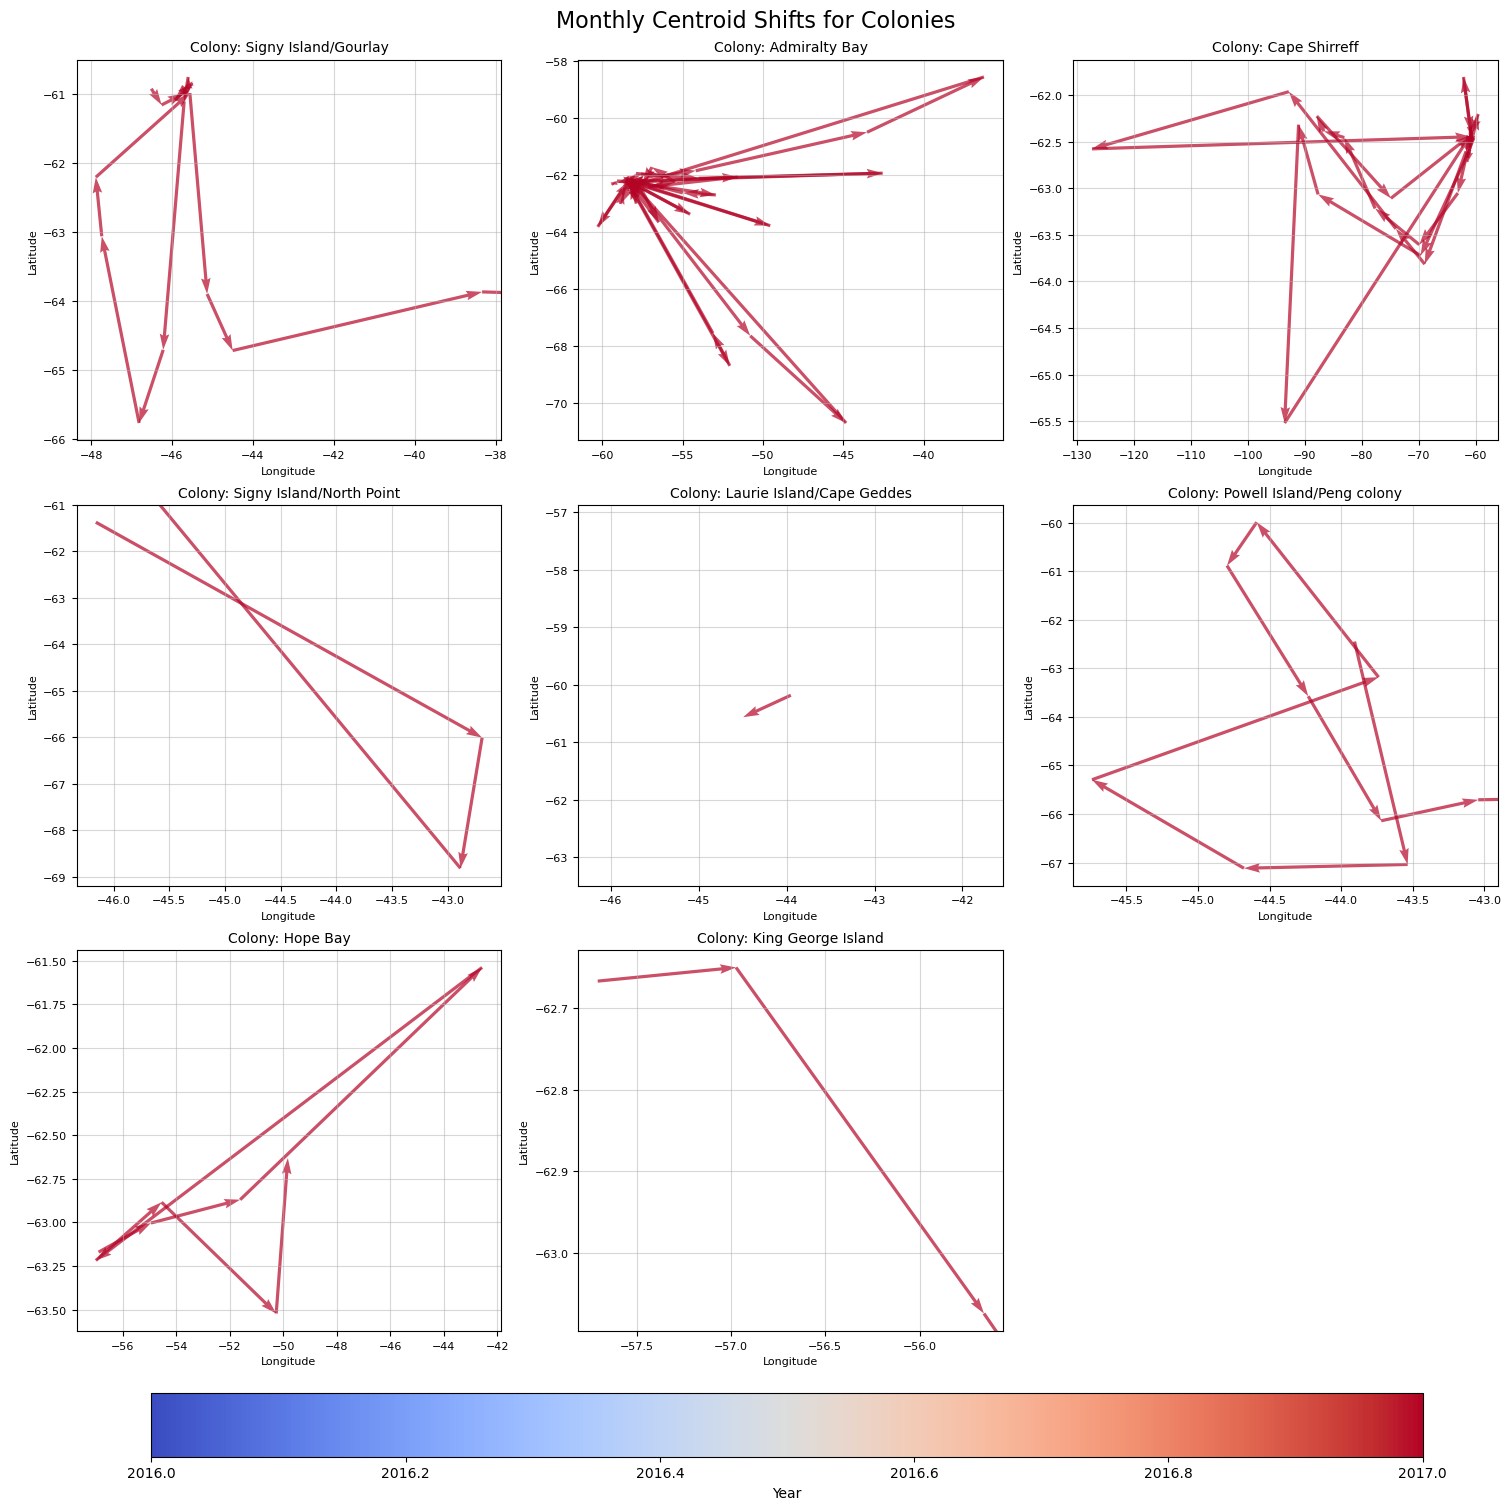

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_colony_shifts_grid(data, lat_col, lon_col, time_col):
    """
    Create a grid of monthly centroid shift plots for all colonies, with minimalist styling.

    Parameters:
        data (pd.DataFrame): The dataset containing colony data.
        lat_col (str): Column representing latitude.
        lon_col (str): Column representing longitude.
        time_col (str): Column representing the date.

    Returns:
        None: Displays the plots in a grid.
    """
    # Ensure datetime format and extract year-month
    data[time_col] = pd.to_datetime(data[time_col], errors='coerce')
    data['year_month'] = data[time_col].dt.to_period('M')  # Format as YYYY-MM

    # Get unique colonies
    unique_colonies = data['colony_name'].unique()
    num_colonies = len(unique_colonies)

    # Set up grid layout (adjust columns for better layout)
    cols = 3
    rows = -(-num_colonies // cols)  # Ceiling division
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)
    axes = axes.flatten()

    # Normalize year for color mapping
    cmap = sns.color_palette("coolwarm", as_cmap=True)

    # Create plots for each colony
    for idx, colony in enumerate(unique_colonies):
        ax = axes[idx]

        # Filter data for this colony
        colony_data = data[data['colony_name'] == colony].copy()

        # Group by year-month and calculate centroids
        centroids = colony_data.groupby('year_month').agg(
            centroid_lat=(lat_col, 'mean'),
            centroid_lon=(lon_col, 'mean')
        ).reset_index()

        # Convert year-month back to datetime for plotting
        centroids['year_month'] = centroids['year_month'].dt.to_timestamp()

        # Calculate shifts between consecutive months
        centroids['prev_centroid_lat'] = centroids['centroid_lat'].shift(1)
        centroids['prev_centroid_lon'] = centroids['centroid_lon'].shift(1)

        centroids['lat_shift'] = centroids['centroid_lat'] - centroids['prev_centroid_lat']
        centroids['lon_shift'] = centroids['centroid_lon'] - centroids['prev_centroid_lon']

        centroids['year'] = centroids['year_month'].dt.year
        centroids = centroids.dropna(subset=['lat_shift', 'lon_shift'])

        # Plot quiver for this colony
        for _, row in centroids.iterrows():
            ax.quiver(
                row['prev_centroid_lon'], row['prev_centroid_lat'],  # Start of arrow
                row['lon_shift'], row['lat_shift'],  # Shift values
                color=cmap(row['year']),
                angles='xy', scale_units='xy', scale=1, alpha=0.7, linewidth=0.5
            )

        ax.set_title(f'Colony: {colony}', fontsize=10)
        ax.set_xlabel('Longitude', fontsize=8)
        ax.set_ylabel('Latitude', fontsize=8)
        ax.tick_params(axis='both', which='major', labelsize=8)
        ax.grid(alpha=0.5)

    # Remove empty axes if colonies < grid size
    for ax in axes[num_colonies:]:
        ax.remove()

    # Add global colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=centroids['year'].min(), vmax=centroids['year'].max()))
    fig.colorbar(sm, ax=axes[:num_colonies], orientation='horizontal', fraction=0.05, pad=0.02, label='Year')

    plt.suptitle('Monthly Centroid Shifts for Colonies', fontsize=16)
    plt.show()

# Example usage
visualize_colony_shifts_grid(
    data=raw_df,
    lat_col='latitude',
    lon_col='longitude',
    time_col='date_gmt'
)
